# Predict Credit Consumption for Customers For a Leading Bank

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from xgboost import  XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE,SelectKBest,f_regression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir(r'C:\Users\Hp\Downloads\11. Capstone Case Study - Predict Cred Card Consumption')

Importing all the Datasets!

In [3]:
ccdata=pd.read_excel('CreditConsumptionData.xlsx')
ccdata.head()

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [4]:
cbdata=pd.read_excel('CustomerBehaviorData.xlsx')
cbdata.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [5]:
cust_demo=pd.read_excel('CustomerDemographics.xlsx')
cust_demo.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0


In [6]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [7]:
cbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [8]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [9]:
#Missing vlaue treatment
def missings_treat(x):
    if x.dtype =='float64':
        x = x.fillna(x.mean())
    if x.dtype=='int64':
        x=x.fillna(x.median())
    elif x.dtype=='object':
        x=x.fillna(x.mode()[0])
    else:
        x
    return (x)

In [10]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99), lower =x.quantile(0.01) )
    return x

In [11]:
def cv_value(x):
    return (x.std()/x.mean())

In [12]:
cbdata=cbdata.apply(missings_treat)

In [13]:
cust_demo=cust_demo.apply(missings_treat)

In [14]:
cbdata.info() #Missing Value Treated!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            20000 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            20000 non-null  float64
 7   cc_count_apr           20000 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [15]:
cust_demo.info() #Missing Value Treated!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  20000 non-null  object 
 2   gender                        20000 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        20000 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   20000 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  20000 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [16]:
cbdata1=cbdata.drop('loan_enq',axis=1)

In [17]:
cbdata1.apply(cv_value)

ID                       0.577394
cc_cons_apr              1.408909
dc_cons_apr              1.792297
cc_cons_may              1.637597
dc_cons_may              2.322999
cc_cons_jun              1.548392
dc_cons_jun              1.872595
cc_count_apr             2.351098
cc_count_may             1.498906
cc_count_jun             1.129140
dc_count_apr             1.129666
dc_count_may             1.219655
dc_count_jun             0.962306
card_lim                 0.649401
personal_loan_active     0.000000
vehicle_loan_active      0.000000
personal_loan_closed     0.000000
vehicle_loan_closed      0.000000
investment_1             4.971054
investment_2             1.749374
investment_3             1.984066
investment_4             2.108322
debit_amount_apr         1.657835
credit_amount_apr        2.301014
debit_count_apr          0.843631
credit_count_apr         1.124951
max_credit_amount_apr    3.609212
debit_amount_may         1.557216
credit_amount_may        2.067544
credit_count_m

In [18]:
numcol=cbdata1.columns
numcol

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active'],
      dtype='object')

In [19]:
q = []
for i in numcol:
    if (len(cbdata1[i].unique()) == 1):
        q.append(i)
        print(i, cbdata1[i].unique())
        
print(q)

personal_loan_active [1]
vehicle_loan_active [1]
personal_loan_closed [1.]
vehicle_loan_closed [1]
['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed']


In [20]:
numcol2 = list(set(numcol) - set(q))
numcol2

['debit_amount_apr',
 'max_credit_amount_apr',
 'credit_amount_may',
 'max_credit_amount_jun',
 'cc_count_apr',
 'investment_3',
 'debit_count_jun',
 'debit_amount_may',
 'cc_count_jun',
 'debit_count_may',
 'max_credit_amount_may',
 'investment_1',
 'dc_cons_may',
 'debit_amount_jun',
 'ID',
 'cc_cons_apr',
 'credit_amount_jun',
 'card_lim',
 'credit_count_apr',
 'dc_count_jun',
 'debit_count_apr',
 'dc_count_apr',
 'dc_count_may',
 'cc_cons_jun',
 'dc_cons_jun',
 'emi_active',
 'credit_count_may',
 'dc_cons_apr',
 'credit_amount_apr',
 'cc_count_may',
 'investment_2',
 'cc_cons_may',
 'investment_4',
 'credit_count_jun']

In [21]:
cbdata1.drop(q,inplace=True ,axis=1)

In [22]:
cbdata1.shape

(20000, 34)

In [23]:
cust_demo

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [24]:
nomcol=['account_type','Income','gender']

In [25]:
custdemo_new = pd.get_dummies(cust_demo, columns = nomcol, drop_first = True)

In [26]:
custdemo_new

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,Income_LOW,Income_MEDIUM,gender_M
0,19427,63,30.1,10,628.0,1,5.0,0,0,1,1
1,16150,36,14.4,10,656.0,0,12.0,0,0,1,1
2,11749,28,4.8,10,314.0,1,13.0,0,0,1,0
3,11635,32,9.6,2,614.0,1,19.0,0,0,1,1
4,8908,32,12.0,7,750.0,1,18.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,66,32.2,6,354.0,1,7.0,0,0,1,0
19996,15992,53,19.8,5,809.0,0,14.0,0,0,1,1
19997,7081,66,18.4,1,466.0,0,10.0,0,0,1,0
19998,6821,32,6.0,8,619.0,0,17.0,0,1,0,1


In [27]:
df=pd.merge(left=cbdata1,right=custdemo_new,how='inner',on='ID')
df

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,Income_LOW,Income_MEDIUM,gender_M
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,30,7.0,5,956.0,1,20.000000,0,0,1,1
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,37,10.2,8,966.0,1,5.000000,0,1,0,1
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,33,3.9,3,505.0,1,15.000000,0,0,1,1
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,63,25.8,6,631.0,0,15.000000,0,1,0,1
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,33,6.5,7,698.0,0,9.000000,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,35,13.5,1,523.0,0,7.000000,0,0,1,1
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,53,9.9,7,723.0,1,2.000000,0,0,1,1
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,62,37.8,8,863.0,1,16.000000,0,0,0,1
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,34,12.6,4,882.0,0,13.000000,0,0,1,1


In [28]:
df=df.apply(missings_treat)

In [29]:
rawtrain=ccdata[ccdata.cc_cons.isnull()==0]
rawtrain

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
14995,6995,4263.0
14996,10376,11019.0
14997,2181,404227.0
14998,18417,28813.0


In [30]:
#DataFrame Created for Train Dataset
df2=pd.merge(left=df,right=rawtrain,how='inner',on='ID')

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
df2.apply(missings_treat)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,Income_LOW,Income_MEDIUM,gender_M,cc_cons
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,1,42,358000,331.200,130000.00,300500.0,12174.00000,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.00,1,108,97916.0,45253.64,47635.00,2,18,19947.00,3448.84,30,7.0,5,956.0,1,20.0,0,0,1,1,13434.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,1,17,114000,5809950.000,3.00,610000.0,2351.00000,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.00,1,4,25125.0,12912.33,18369.00,3,49,20585.00,3812.69,37,10.2,8,966.0,1,5.0,0,1,0,1,449.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,62,42,360000,27324.000,176487.60,2156.0,3735.00000,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.00,70,11,38546.0,93567.51,26713.00,47,49,13950.00,9432.90,33,3.9,3,505.0,1,15.0,0,0,1,1,11968.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,12,58,155000,370776.000,63000.00,26241.0,0.00000,78122.15,49660.00,42.0,26,72186.0,14719.00,46132.05,43,1,180315.0,176394.48,35062.74,3,37,37018.00,144.61,63,25.8,6,631.0,0,15.0,0,1,0,1,32029.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,5,80,362000,10006.200,7216.53,13873.0,-4679.00000,6855.71,933699.00,46.0,35,18867.0,189938.76,37191.00,2,14,13480.0,3167.00,19056.00,2,15,24274.00,1887.89,33,6.5,7,698.0,0,9.0,1,0,1,1,16394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,44,55,29,520000,186189.000,24000.00,16215.0,977.00000,30608.54,31135.00,79.0,2,27608.0,30501.77,23692.00,1,8,6936.0,487751.19,42625.50,14,8,82851.00,78966.76,53,13.2,9,653.0,1,20.0,0,1,0,0,4263.0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,7,1,2,472000,24832.000,221000.00,12337.0,-6281.37988,39903.00,23797.00,43.0,2,30512.0,57918.69,50023.00,4,20,202639.0,8666.01,34987.55,11,18,118110.47,4762.10,44,2.4,9,535.0,1,2.0,0,0,1,1,11019.0
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,24,3,3,44000,180615.020,253000.00,25000.0,10210.00000,29525.63,95477.27,4.0,1,41085.0,25404.75,35239.00,43,5,44421.0,97896.48,261432.00,4,73,49545.00,2877.33,37,3.4,9,464.0,1,8.0,0,0,1,1,404227.0
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,3,9,1,359000,3299447.136,393982.10,3975.0,-4664.00000,119370.54,59644.00,3.0,29,19110.0,46086.90,82193.00,3,25,22409.0,22693.92,33025.29,3,80,16130.00,13006.84,220,40.0,10,536.0,1,3.0,0,0,1,1,28813.0


In [33]:
df2.drop('ID',inplace=True,axis=1)

In [34]:
df2.describe()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,Income_LOW,Income_MEDIUM,gender_M,cc_cons
count,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.489507,33.490200,41.507000,17.171000,13.979733,30.287267,277005.147400,6.194140e+05,2.333642e+05,44440.966681,3523.049025,6.823421e+04,8.079761e+04,36.402216,11.291400,5.438954e+04,6.554492e+04,8.356935e+04,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576136e+04,47.790600,15.184007,5.510000,598.415467,0.719533,11.049603,0.151533,0.279200,0.640800,0.863000,55157.729867
std,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.432146,49.540999,47.342918,19.359678,17.087203,29.252490,179429.540139,3.087815e+06,4.073237e+05,88112.058686,7373.355434,1.126786e+05,1.989060e+05,30.700057,12.670785,1.950943e+05,1.016829e+05,1.776300e+05,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179152e+05,30.632766,20.312648,2.865783,220.062345,0.449242,5.492196,0.358580,0.448621,0.479782,0.343859,97670.972252
min,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,0.000000,0.000000,1.000000e+00,2.820000e+01,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,8.000000,10.000000,2.000000,2.000000,4.000000,124000.000000,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.323043e+04,2.684600e+04,11.000000,2.000000,2.068300e+04,2.100333e+04,2.541027e+04,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549770e+03,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,6768.000000
50%,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,23.000000,35.000000,7.000000,5.000000,17.000000,272000.000000,4.503600e+04,1.110000e+05,13873.000000,2351.000000,4.187560e+04,4.709700e+04,32.000000,5.000000,3.191500e+04,3.823568e+04,4.814000e+04,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.957470e+03,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,0.000000,0.000000,1.000000,1.000000,13364.000000
75%,21405.000000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.000000,61.000000,25.000000,21.000000,54.000000,400000.000000,1.617040e+05,2.450000e+05,48950.000000,6885.000000,7.536829e+04,8.593500e+04,52.000000,19.000000,5.255900e+04,7.440055e+04,9.456936e+04,11.000000,69.000000,5.598600

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

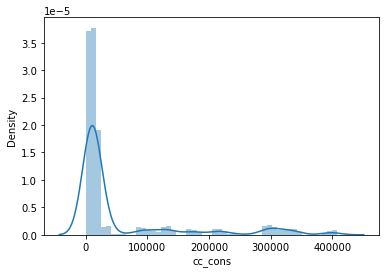

In [35]:
#Visualizing Distribution of Y Variable!
sns.distplot(df2.cc_cons) 

In [36]:
#Checking if any Infinite values are there before plotting Log Transformation of Y Variable!
np.isinf(np.log(df2.cc_cons)).sum()

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1

In [37]:
lg_cc=np.log(df2.cc_cons)

In [38]:
lg_cc.replace([np.inf,-np.inf],1,inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

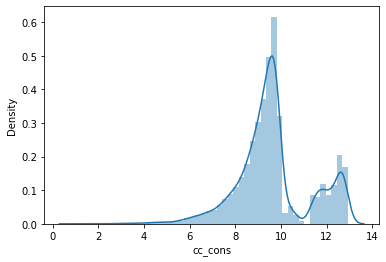

In [39]:
#Log transformation has Normal Distribution!
sns.distplot(lg_cc) 

In [40]:
#X Variables segreation before transforming X Vars into Log Transformation as Binary Variables 
#becomes Infinite and Nan with Log Transformation!
df3=df2[df2.columns.difference(['account_type_saving','Income_LOW','Income_MEDIUM','gender_M','NetBanking_Flag'])]

In [216]:
#Replacing if any Inf and Nan values are present
df3.replace([np.inf,-np.inf,np.nan],1,inplace=True)

In [215]:
#Transformed all the X Vars into Log!
df3_lg=np.log(df3)

In [43]:
#If any Inf and Nan occur after Transformation it has been Replaced by 1!
df3_lg.replace([np.inf,-np.inf,np.nan],1,inplace=True)

In [44]:
#The Binary Vars saved in col!
col=df2[['account_type_saving','Income_LOW','Income_MEDIUM','gender_M','NetBanking_Flag']]

In [45]:
#All the Vars joined in a DataFrame!
df3_lg=df3_lg.join(col)

In [46]:
#K_Means used for Segmentation!
km3=KMeans(n_clusters=3).fit(df3_lg)

In [47]:
#Labels added for Segmentation!
df3_lg['km3']=km3.labels_

In [48]:
#Percentage of Population of Each Clusters!
df3_lg.km3.value_counts()/df3_lg.km3.value_counts().sum()

2    0.463733
0    0.278600
1    0.257667
Name: km3, dtype: float64

In [49]:
#X and Y Variables separated!
x=df3_lg[df3_lg.columns.difference(['cc_cons'])]
y=df3_lg.cc_cons

In [52]:
#RFE used for Feature Reduction!
rfe = RFE(estimator = RandomForestRegressor(), n_features_to_select=7).fit(x,y)

In [53]:
imp_var_rfe=list(x.columns[rfe.get_support()])
imp_var_rfe

['cc_cons_apr',
 'cc_cons_jun',
 'cc_cons_may',
 'credit_amount_may',
 'debit_amount_may',
 'emi_active',
 'max_credit_amount_jun']

In [54]:
#SKB also used for Feature Reduction!
SKB = SelectKBest(f_regression, k=7).fit(x,y)

In [55]:
imp_var_skb=list(x.columns[SKB.get_support()])
imp_var_skb

['cc_cons_may',
 'cc_count_apr',
 'cc_count_may',
 'credit_amount_apr',
 'debit_count_apr',
 'investment_3',
 'max_credit_amount_jun']

In [56]:
#A set of Variables chosen after RFE AND SKB!
list(set(imp_var_rfe + imp_var_skb))

['cc_cons_jun',
 'emi_active',
 'debit_amount_may',
 'credit_amount_apr',
 'credit_amount_may',
 'debit_count_apr',
 'cc_count_may',
 'max_credit_amount_jun',
 'cc_count_apr',
 'cc_cons_may',
 'investment_3',
 'cc_cons_apr']

In [57]:
imp_vars=['cc_count_apr',
 'credit_amount_apr',
 'investment_3',
 'debit_amount_jun',
 'cc_cons_jun',
 'max_credit_amount_jun',
 'debit_amount_may',
 'cc_count_may',
 'cc_cons_apr',
 'debit_count_apr',
 'cc_cons_may']

In [105]:
#A DataFrame created with K_means labels ready for Segregation!
df_seg=df3_lg[imp_vars+['km3','cc_cons']]

In [106]:
df_seg

,cc_count_apr,credit_amount_apr,investment_3,debit_amount_jun,cc_cons_jun,max_credit_amount_jun,debit_amount_may,cc_count_may,cc_cons_apr,debit_count_apr,cc_cons_may,km3,cc_cons
0,2.944439,10.223118,12.613203,10.720038,8.437277,9.900834,10.713854,2.302585,8.135230,4.634729,6.982269,1,9.505544
1,1.386294,10.835337,13.321214,9.465938,11.076279,9.932318,11.674837,4.094345,9.805531,3.688879,8.719935,2,6.107023
2,0.693147,10.179034,7.676010,11.446438,10.552317,9.543235,9.591946,4.418841,8.758357,2.397895,9.082393,2,9.389992
3,2.484907,10.812955,10.175078,12.080478,10.277255,10.519160,9.596894,0.693147,9.454514,3.737670,9.725906,0,10.374397
4,2.708050,13.746909,9.537700,8.060540,6.999651,10.097161,12.154457,2.564949,10.233500,3.828641,8.854594,0,9.704671
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.098612,10.346088,9.693692,13.097561,8.799812,11.324799,10.325540,3.583519,9.253760,4.369448,8.889066,2,8.357728
14996,0.000000,10.077315,9.420358,9.067164,7.702140,11.679376,10.966795,3.526361,10.305290,3.761200,9.681936,0,9.307376
14997,4.043051,11.466643,10.126631,11.491666,10.700182,10.810637,10.142691,3.135494,8.330618,1.386294,9.870978,2,12.909732
14998,1.945910,10.996149,8.287780,10.029852,9.936874,9.688436,10.738284,4.852030,11.657666,1.098612,10.699668,0,10.268582


## OLS Regression Model with and without Segmentation

### First Segmentation Model

In [60]:
seg_0=df_seg[df_seg.km3==0]

In [ ]:
#Variables dropped till VIF reduced <=5, if cc_cons also dropped the remaining variables VIF value is less<=5!

In [212]:
seg_0.drop(['debit_amount_jun','debit_amount_may','credit_amount_apr','km3'],axis=1,inplace=True)

In [211]:
seg_0.drop(['cc_cons_apr','max_credit_amount_jun','cc_cons_may'],axis=1,inplace=True)

In [210]:
seg_0.drop(['cc_cons_jun','investment_3'],axis=1,inplace=True)

In [64]:
vif=pd.concat([pd.Series(seg_0.columns), pd.Series([variance_inflation_factor(seg_0.values, i ) for i in range(0,len(seg_0.columns))])], axis=1)
vif.columns=['Features','VIF']
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
3,cc_cons,11.963542
2,debit_count_apr,7.744227
1,cc_count_may,5.726433
0,cc_count_apr,3.682016


In [65]:
train_0,test_0=train_test_split(seg_0,test_size=0.2,random_state=123)

In [66]:
features_0=['debit_count_apr','cc_count_may','cc_count_apr']

In [67]:
fa0='cc_cons~'+'+'.join(features_0)
fa0

'cc_cons~debit_count_apr+cc_count_may+cc_count_apr'

In [68]:
model_ols0=smf.ols(formula=fa0,data=train_0).fit()

In [69]:
print(model_ols0.summary())

                            OLS Regression Results                            
Dep. Variable:                cc_cons   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.924
Date:                Fri, 11 Nov 2022   Prob (F-statistic):            0.00828
Time:                        11:42:46   Log-Likelihood:                -6322.0
No. Observations:                3343   AIC:                         1.265e+04
Df Residuals:                    3339   BIC:                         1.268e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.8287      0.116     

In [70]:
#Predicting the values with the Model we fit!
pred_train0 = (model_ols0.predict(train_0))
act_train0=(train_0.cc_cons)

pred_test0=(model_ols0.predict(test_0))
act_test0=(test_0.cc_cons)

In [71]:
print('MAPE_Train', np.mean(np.abs(pred_train0 - act_train0)/act_train0)*100)
print('MAPE_Test', np.mean(np.abs(pred_test0 - act_test0)/act_test0)*100)

MAPE_Train 12.985211047990402
MAPE_Test 12.711582993899706


In [72]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train0-pred_train0)/act_train0))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test0-pred_test0)/act_test0))))*100)

train_RMSPE: 28.059055006582557
test_RMSPE: 19.115290790473598


### Second Segmentation Model

In [73]:
seg_1=df_seg[df_seg.km3==1]

In [213]:
seg_1.drop('km3',axis=1,inplace=True)

In [75]:
vif=pd.concat([pd.Series(seg_1.columns), pd.Series([variance_inflation_factor(seg_1.values, i ) for i in range(0,len(seg_1.columns))])], axis=1)
vif.columns=['Features','VIF']
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
3,debit_amount_jun,74.188279
1,credit_amount_apr,70.782472
6,debit_amount_may,70.743041
8,cc_cons_apr,56.075411
5,max_credit_amount_jun,52.726695
10,cc_cons_may,51.727127
4,cc_cons_jun,50.199420
11,cc_cons,35.208175
2,investment_3,25.088407
9,debit_count_apr,9.517253


In [76]:
#We choose same vars as 1st segmentation as only those vars have VIF Values <=5!
seg_1=seg_1[['debit_count_apr','cc_count_may','cc_count_apr','cc_cons']]

In [77]:
train_1,test_1=train_test_split(seg_1,test_size=0.2,random_state=123)

In [78]:
fa1='cc_cons~'+'+'.join(features_0)
fa1

'cc_cons~debit_count_apr+cc_count_may+cc_count_apr'

In [79]:
model_ols1=smf.ols(formula=fa1,data=train_1).fit()

In [80]:
print(model_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                cc_cons   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2663
Date:                Fri, 11 Nov 2022   Prob (F-statistic):              0.850
Time:                        11:42:47   Log-Likelihood:                -5849.9
No. Observations:                3092   AIC:                         1.171e+04
Df Residuals:                    3088   BIC:                         1.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.5794      0.122     

In [81]:
pred_train1 = (model_ols1.predict(train_1))
act_train1=(train_1.cc_cons)

pred_test1=(model_ols1.predict(test_1))
act_test1=(test_1.cc_cons)

In [82]:
print('MAPE_Train', np.mean(np.abs(pred_train1 - act_train1)/act_train1)*100)
print('MAPE_Test', np.mean(np.abs(pred_test1 - act_test1)/act_test1)*100)

MAPE_Train 12.661856631533217
MAPE_Test 12.953773869695222


In [83]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train1-pred_train1)/act_train1))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test1-pred_test1)/act_test1))))*100)

train_RMSPE: 20.21683167992756
test_RMSPE: 20.900205538679558


### Third Segmentation Model

In [84]:
seg_2=df_seg[df_seg.km3==2]

In [214]:
seg_2.drop('km3',axis=1,inplace=True)

In [86]:
vif=pd.concat([pd.Series(seg_2.columns), pd.Series([variance_inflation_factor(seg_2.values, i ) for i in range(0,len(seg_2.columns))])], axis=1)
vif.columns=['Features','VIF']
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
3,debit_amount_jun,80.877565
6,debit_amount_may,75.996744
1,credit_amount_apr,75.604121
8,cc_cons_apr,57.472041
5,max_credit_amount_jun,54.234790
10,cc_cons_may,53.504336
4,cc_cons_jun,52.195960
11,cc_cons,34.538590
2,investment_3,25.068574
9,debit_count_apr,9.136300


In [87]:
#We follow same steps as we did for 1st and 2nd Segmentation!
seg_2=seg_2[['debit_count_apr','cc_count_may','cc_count_apr','cc_cons']]

In [88]:
train_2,test_2=train_test_split(seg_2,test_size=0.2,random_state=123)

In [89]:
fa2='cc_cons~'+'+'.join(features_0)
fa2

'cc_cons~debit_count_apr+cc_count_may+cc_count_apr'

In [90]:
model_ols2=smf.ols(formula=fa2,data=train_2).fit()

In [91]:
print(model_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                cc_cons   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4082
Date:                Fri, 11 Nov 2022   Prob (F-statistic):              0.747
Time:                        11:42:47   Log-Likelihood:                -10538.
No. Observations:                5564   AIC:                         2.108e+04
Df Residuals:                    5560   BIC:                         2.111e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.6801      0.091    1

In [92]:
pred_train2 = (model_ols2.predict(train_2))
act_train2=(train_2.cc_cons)

pred_test2=(model_ols2.predict(test_2))
act_test2=(test_2.cc_cons)

In [93]:
print('MAPE_Train', np.mean(np.abs(pred_train2 - act_train2)/act_train2)*100)
print('MAPE_Test', np.mean(np.abs(pred_test2 - act_test2)/act_test2)*100)

MAPE_Train 12.781709162561974
MAPE_Test 12.676620349753076


In [94]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train2-pred_train2)/act_train2))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test2-pred_test2)/act_test2))))*100)

train_RMSPE: 23.205496176154185
test_RMSPE: 20.4431240245661


### Without Segmentation Model

In [95]:
df_seg=df_seg[['debit_count_apr','cc_count_may','cc_count_apr','cc_cons']]

In [96]:
train_s,test_s=train_test_split(df_seg,test_size=0.2,random_state=123)

In [97]:
fas='cc_cons~'+'+'.join(features_0)
fas

'cc_cons~debit_count_apr+cc_count_may+cc_count_apr'

In [98]:
model_olss=smf.ols(formula=fas,data=train_s).fit()

In [99]:
print(model_olss.summary())

                            OLS Regression Results                            
Dep. Variable:                cc_cons   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.310
Date:                Fri, 11 Nov 2022   Prob (F-statistic):             0.0743
Time:                        11:42:48   Log-Likelihood:                -22795.
No. Observations:               12000   AIC:                         4.560e+04
Df Residuals:                   11996   BIC:                         4.563e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.6333      0.062    1

In [100]:
pred_trains = (model_olss.predict(train_s))
act_trains=(train_s.cc_cons)

pred_tests=(model_olss.predict(test_s))
act_tests=(test_s.cc_cons)

In [101]:
print('MAPE_Train', np.mean(np.abs(pred_trains - act_trains)/act_trains)*100)
print('MAPE_Test', np.mean(np.abs(pred_tests - act_tests)/act_tests)*100)

MAPE_Train 12.83024484421966
MAPE_Test 12.729021305294804


In [102]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_trains-pred_trains)/act_trains))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_tests-pred_tests)/act_tests))))*100)

train_RMSPE: 22.146902967539813
test_RMSPE: 27.439034525130907


We choose same vars for each Segmentation and without Segmentation as only those vars have VIF values<=5 , we have to ignore 
p-values as this is a complex dataset the p-values are High!

### KNN Regressor Model with and without Segmentation

#### First Segementation Model for KNN

In [110]:
#We choose same segmentation Data points for KNN Model!
seg_k0=df_seg[df_seg.km3==0]

In [111]:
seg_k0.drop('km3',axis=1,inplace=True)

In [112]:
#Segregating x and y variables for Train and Test Split!
seg_k0_x=seg_k0[seg_k0.columns.difference(['cc__cons'])]

In [113]:
seg_k0_y=seg_k0.cc_cons

In [114]:
train_x0, test_x0, train_y0, test_y0 = train_test_split(seg_k0_x,seg_k0_y, test_size = 0.3, random_state = 42)

In [294]:
#Setting up the Model!
knn=KNeighborsRegressor(n_neighbors=3,weights='uniform')

In [295]:
knn.fit(train_x0,train_y0)

KNeighborsRegressor(n_neighbors=3)

In [296]:
pred_train_k0 = (knn.predict(train_x0))
act_train_k0=(train_y0)

pred_test_k0=(knn.predict(test_x0))
act_test_k0=(test_y0)

In [297]:
print('MAPE_Train', np.mean(np.abs(pred_train_k0 -act_train_k0)/act_train_k0)*100)
print('MAPE_Test', np.mean(np.abs(pred_test_k0 - act_test_k0)/act_test_k0)*100)

MAPE_Train 11.136381448969141
MAPE_Test 16.44113015573352


In [298]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train_k0-pred_train_k0)/act_train_k0))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test_k0-pred_test_k0)/act_test_k0))))*100)

train_RMSPE: 17.82761337034906
test_RMSPE: 31.740404419861335


#### Second Segmentation Model for KNN

In [120]:
#Same Steps followed as followed for 1st segmentation!
seg_k1=df_seg[df_seg.km3==1]

In [121]:
seg_k1.drop('km3',axis=1,inplace=True)

In [122]:
seg_k1_x=seg_k1[seg_k1.columns.difference(['cc__cons'])]
seg_k1_y=seg_k1.cc_cons

In [123]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(seg_k1_x,seg_k1_y, test_size = 0.3, random_state = 42)

In [288]:
knn=KNeighborsRegressor(n_neighbors=3,weights='uniform')

In [289]:
knn.fit(train_x1,train_y1)

KNeighborsRegressor(n_neighbors=3)

In [290]:
pred_train_k1 = (knn.predict(train_x1))
act_train_k1=(train_y1)

pred_test_k1=(knn.predict(test_x1))
act_test_k1=(test_y1)

In [291]:
print('MAPE_Train', np.mean(np.abs(pred_train_k1 -act_train_k1)/act_train_k1)*100)
print('MAPE_Test', np.mean(np.abs(pred_test_k1 - act_test_k1)/act_test_k1)*100)

MAPE_Train 11.059030757929314
MAPE_Test 15.132888739321487


In [292]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train_k1-pred_train_k1)/act_train_k1))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test_k1-pred_test_k1)/act_test_k1))))*100)

train_RMSPE: 15.894873828439005
test_RMSPE: 21.36920475874565


#### Third Segmentation Model for KNN

In [129]:
#Same Steps followed as followed for 2nd segmentation!
seg_k2=df_seg[df_seg.km3==2]

In [130]:
seg_k2.drop('km3',axis=1,inplace=True)

In [131]:
seg_k2_x=seg_k2[seg_k2.columns.difference(['cc__cons'])]
seg_k2_y=seg_k2.cc_cons

In [132]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(seg_k2_x,seg_k2_y, test_size = 0.3, random_state = 42)

In [278]:
knn=KNeighborsRegressor(n_neighbors=3,weights='uniform')

In [279]:
knn.fit(train_x2,train_y2)

KNeighborsRegressor(n_neighbors=3)

In [280]:
pred_train_k2 = (knn.predict(train_x2))
act_train_k2=(train_y2)

pred_test_k2=(knn.predict(test_x2))
act_test_k2=(test_y2)

In [281]:
print('MAPE_Train', np.mean(np.abs(pred_train_k2 -act_train_k2)/act_train_k2)*100)
print('MAPE_Test', np.mean(np.abs(pred_test_k2 - act_test_k2)/act_test_k2)*100)

MAPE_Train 11.188386450147132
MAPE_Test 15.719783154036843


In [282]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train_k2-pred_train_k2)/act_train_k2))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test_k2-pred_test_k2)/act_test_k2))))*100)

train_RMSPE: 16.07212165577097
test_RMSPE: 28.55019082113114


#### Without Segmentation Model For KNN

In [138]:
#Same steps followed as done in above Segmentations!
df_seg.drop('km3',axis=1,inplace=True)

In [255]:
x=df_seg[df_seg.columns.difference(['cc__cons'])]
y=df_seg.cc_cons

In [256]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [283]:
knn.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=3)

In [284]:
pred_train_k = (knn.predict(train_x))
act_train_k=(train_y)

pred_test_k=(knn.predict(test_x))
act_test_k=(test_y)

In [285]:
print('MAPE_Train', np.mean(np.abs(pred_train_k -act_train_k)/act_train_k)*100)
print('MAPE_Test', np.mean(np.abs(pred_test_k - act_test_k)/act_test_k)*100)

MAPE_Train 11.305036918458121
MAPE_Test 15.598332222709907


In [286]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train_k-pred_train_k)/act_train_k))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test_k-pred_test_k)/act_test_k))))*100)

train_RMSPE: 18.336987517131707
test_RMSPE: 23.14910883894646


### XGBoost Regressor Model

In [145]:
#Setting up Parameter Grid for Grid Search to get Best Params!
param_grid = {'learning_rate' : [0.01, 0.05, 0.1],'n_estimators' : [100,200,300],'max_depth' : [2,3,4]}

In [146]:
xgcv = GridSearchCV(XGBRegressor(), param_grid, cv=5)

In [147]:
xgcv.fit(train_x,train_y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [148]:
xgcv.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300}

In [149]:
xgb=XGBRegressor(learning_rate=0.05,n_estimators=300, max_depth=4,random_state=42)

In [267]:
xgb.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [270]:
pred_train_x = (xgb.predict(train_x))
act_train_x=(train_y)

pred_test_x=(xgb.predict(test_x))
act_test_x=(test_y)

In [271]:
print('MAPE_Train', np.mean(np.abs(pred_train_x -act_train_x)/act_train_x)*100)
print('MAPE_Test', np.mean(np.abs(pred_test_x - act_test_x)/act_test_x)*100)

MAPE_Train 12.083728960025288
MAPE_Test 12.854731058424804


In [272]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train_x-pred_train_x)/act_train_x))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test_x-pred_test_x)/act_test_x))))*100)

train_RMSPE: 22.318285438053916
test_RMSPE: 21.099747880116187


## Feature Scaling Using PowerTransformer

In [154]:
#Setting up for PowerTransformation with Method of BOX-COX!
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)

In [155]:
#As box-cox strictly transforms only positive data we segregate the binary variables as it contains 0 values also!
dff=df2[df2.columns.difference(['account_type_saving','Income_LOW','Income_MEDIUM','gender_M','NetBanking_Flag'])]

In [156]:
#Transformation!
dfpt=pd.DataFrame(pt.fit_transform(abs(dff).replace(to_replace=0,method='ffill')),columns=dff.columns)

In [157]:
dfpt

,Avg_days_between_transaction,Emp_Tenure_Years,Tenure_with_Bank,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,dc_cons_apr,dc_cons_jun,dc_cons_may,dc_count_apr,dc_count_jun,dc_count_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,investment_1,investment_2,investment_3,investment_4,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,region_code
0,10.953541,1.990741,3.055784,0.785377,1887.409695,8.779519,9.891856,10.799900,7.861576,2.597708,0.759275,2.692114,24.353530,38.711419,32.060281,3.285000,0.652135,0.000000,10.097507,9.009229,9.495064,3.976202,5.664281,0.000000,34.038865,25.758339,24.213879,9.195129,5.247934,6.399450,10.267254,6.794169,56.327403,13.752561,47.219352,25.775886,33.884632,36.282939,650.289605
1,3.081847,2.386433,4.860130,0.787955,1014.215199,5.801663,12.429474,15.374832,10.119297,1.305996,0.000000,5.434973,27.350506,31.060901,28.417870,3.261372,0.997969,0.000000,10.553619,8.915134,10.330140,1.387014,3.864863,0.000000,35.705496,20.326022,28.620783,6.299462,8.884680,1.516009,10.424408,24.209009,1.243136,14.596255,28.314713,25.177568,34.143731,27.482819,656.652267
2,8.605231,1.382806,1.681435,0.786633,1893.123122,8.681060,10.815531,14.411632,10.606941,0.672671,6.605511,6.005124,24.148219,33.893042,31.312831,1.069409,2.787855,2.791259,8.013658,8.037807,11.630217,1.387014,5.664281,3.490975,29.069295,29.387745,19.747230,3.364660,8.884680,2.803703,11.883620,13.556338,60.572371,8.088482,32.778604,23.821283,31.060281,30.032525,357.769900
3,8.605231,3.376746,3.683652,0.792125,1198.315087,9.513698,11.879677,13.917242,11.487359,2.234775,4.056410,0.725947,27.236000,36.088697,32.560095,3.010048,0.997969,2.584207,10.767671,8.393355,10.511756,3.181840,6.393325,2.244000,44.185624,32.883937,19.765471,6.431547,7.721961,0.000000,5.717890,18.362746,47.341086,10.908222,32.778604,30.852152,39.304516,40.956463,440.775334
4,5.484071,1.913260,4.283418,0.786633,1898.822031,8.948736,13.112082,8.579276,10.299776,2.412822,7.336793,3.054243,46.084502,31.329201,31.118430,3.261372,0.652135,0.644226,9.469530,7.095837,9.047970,1.947329,7.170254,1.505956,24.926861,15.304846,31.045280,6.682490,4.721787,3.135924,9.341049,11.875054,27.634121,10.179981,35.172849,23.731886,35.528986,24.093864,484.454535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,10.953541,2.659432,5.417416,0.791062,2311.085729,7.792896,11.569254,11.388845,10.346109,1.047768,1.270888,4.585622,24.933501,37.741556,28.274860,0.681445,2.106355,0.000000,8.760199,9.440743,9.811686,3.789559,4.886107,3.405678,35.616855,39.209546,22.590204,8.307571,3.162487,2.380331,15.604429,17.027921,37.395831,10.357632,21.299337,25.600560,47.524159,20.857021,455.149942
14996,0.904132,0.884467,5.417416,0.789628,2192.801737,8.610548,13.227927,9.641930,11.426599,0.000000,1.667890,4.494109,23.679664,36.070890,33.116474,0.681445,1.952233,1.199708,11.344088,6.852057,10.768501,1.947329,0.745848,0.000000,37.877411,18.795781,25.318574,6.495870,5.247934,3.646335,10.775906,13.392400,63.883246,10.046595,38.541633,26.110489,51.612460,41.907256,377.645630
14997,4.916127,1.241407,5.417416,0.787955,604.641255,11.595286,10.178603,14.680580,11.688460,3.408798,7.336793,3.886535,30.744803,56.651087,30.766262,0.000000,1.228653,2.584207,8.387249,7.641347,7.050979,3.181840,1.234917,1.049717,35.319151,29.626623,21.854839,1.679157,10.762112,1.785987,9.985553,16.970138,65.954394,10.852648,44.751088,27.676111,42.117227,30.920034,330.479350
14998,1.690723,3.852212,5.957996,0.795600,1890.268231,9.424861,15.484177,13.315956,12.856033,1.790183,6.428209,6.805450,28.184700,35.595012,36.710472,3.102803,0.997969,0.979110,11.560628,7.040905,13.020869,1.099065,0.000000,2.007404,48.637143,22.6

<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

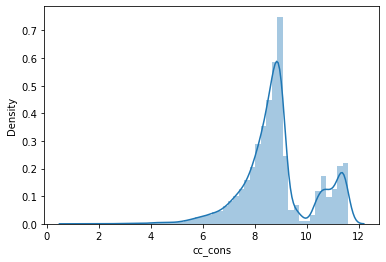

In [158]:
#Feature Scaling Using PowerTransformer also gives Normal Distribution!
sns.distplot(dfpt.cc_cons) 

In [159]:
x_1=dfpt[dfpt.columns.difference(['cc_con'])]

In [160]:
col2=df2[['account_type_saving','Income_LOW','Income_MEDIUM','gender_M','NetBanking_Flag']]

In [161]:
#X and Y variables have been setup and the binary variables are also joined and ready for Feature Reduction!
x_1=x_1.join(col2)

In [165]:
y_1=dfpt.cc_cons

In [166]:
#RFE Feature Reduction!
rfe_1 = RFE(estimator = RandomForestRegressor(), n_features_to_select=7).fit(x_1,y_1)

In [167]:
imp_var_rfe1=list(x_1.columns[rfe_1.get_support()])
imp_var_rfe1

['cc_cons',
 'credit_amount_jun',
 'credit_count_apr',
 'dc_count_may',
 'debit_amount_may',
 'investment_4',
 'max_credit_amount_jun']

In [168]:
#SKB Feature Reduction!
SKB_1 = SelectKBest(f_regression, k=7).fit(x_1,y_1)

In [169]:
imp_var_skb1=list(x_1.columns[SKB_1.get_support()])
imp_var_skb1

['Avg_days_between_transaction',
 'cc_cons',
 'cc_count_may',
 'credit_amount_apr',
 'debit_count_apr',
 'investment_3',
 'max_credit_amount_jun']

In [170]:
list(set(imp_var_rfe1 + imp_var_skb1))

['cc_cons',
 'credit_count_apr',
 'debit_amount_may',
 'credit_amount_apr',
 'debit_count_apr',
 'Avg_days_between_transaction',
 'cc_count_may',
 'max_credit_amount_jun',
 'credit_amount_jun',
 'investment_3',
 'investment_4',
 'dc_count_may']

### OLS Regression with PowerTransformation

Same basic steps followed as done in previous OLS Regression like choosing vars which have 
vif values <=5 and ignoring p-values!

In [171]:
imp_vars1=[#'cc_count_may',
 'Avg_days_between_transaction',
 #'cc_cons_may',
 #'credit_amount_may',
 #'cc_cons_apr',
 'max_credit_amount_jun',
 #'credit_amount_apr',
 #'cc_cons_jun',
 #'investment_3',
 'debit_count_apr']
 #'debit_amount_may',
 #'emi_active'

In [172]:
dfpt1=dfpt[imp_vars1]
dfpt1

,Avg_days_between_transaction,max_credit_amount_jun,debit_count_apr
0,10.953541,33.884632,9.195129
1,3.081847,34.143731,6.299462
2,8.605231,31.060281,3.364660
3,8.605231,39.304516,6.431547
4,5.484071,35.528986,6.682490
...,...,...,...
14995,10.953541,47.524159,8.307571
14996,0.904132,51.612460,6.495870
14997,4.916127,42.117227,1.679157
14998,1.690723,32.181273,1.277606


In [173]:
vif=pd.concat([pd.Series(dfpt1.columns), pd.Series([variance_inflation_factor(dfpt1.values, i ) for i in range(0,len(imp_vars1))])], axis=1)
vif.columns=['Features','VIF']
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
1,max_credit_amount_jun,6.293553
2,debit_count_apr,4.663512
0,Avg_days_between_transaction,4.469329


In [174]:
dfpt1=dfpt[imp_vars1+['cc_cons']]

In [175]:
train_pt,test_pt=train_test_split(dfpt1,test_size=0.2,random_state=123)

In [176]:
features_pt=[ 'Avg_days_between_transaction','max_credit_amount_jun','debit_count_apr']

In [177]:
fapt='cc_cons~'+'+'.join(features_pt)
fapt

'cc_cons~Avg_days_between_transaction+max_credit_amount_jun+debit_count_apr'

In [178]:
model_olspt=smf.ols(formula=fapt,data=train_pt).fit()

In [179]:
print(model_olspt.summary())

                            OLS Regression Results                            
Dep. Variable:                cc_cons   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.099
Date:                Fri, 11 Nov 2022   Prob (F-statistic):              0.348
Time:                        13:39:42   Log-Likelihood:                -20815.
No. Observations:               12000   AIC:                         4.164e+04
Df Residuals:                   11996   BIC:                         4.167e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [180]:
pred_train_pt = (model_olspt.predict(train_pt))
act_train_pt=(train_pt.cc_cons)

pred_test_pt=(model_olspt.predict(test_pt))
act_test_pt=(test_pt.cc_cons)

In [181]:
print('MAPE_Train', np.mean(np.abs(pred_train_pt - act_train_pt)/act_train_pt)*100)
print('MAPE_Test', np.mean(np.abs(pred_test_pt - act_test_pt)/act_test_pt)*100)

MAPE_Train 11.694669411432866
MAPE_Test 11.659709409663265


In [182]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train_pt-pred_train_pt)/act_train_pt))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test_pt-pred_test_pt)/act_test_pt))))*100)

train_RMSPE: 19.019227664252163
test_RMSPE: 25.229948896243208


## KNN Regressor Model after PowerTransformation

In [183]:
#Vars which we got from RFE and SKB after PowerTransformation!
f_vars1=['cc_count_may',
 'Avg_days_between_transaction',
 'cc_cons_may',
 'credit_amount_may',
 'cc_cons_apr',
 'max_credit_amount_jun',
 'credit_amount_apr',
 'cc_cons_jun',
 'investment_3',
 'debit_count_apr',
 'debit_amount_may',
 'emi_active']

In [184]:
#DataFrame created after PowerTransformation and Ready for KNN Model!
dfpt=dfpt[f_vars1+['cc_cons']]
dfpt

,cc_count_may,Avg_days_between_transaction,cc_cons_may,credit_amount_may,cc_cons_apr,max_credit_amount_jun,credit_amount_apr,cc_cons_jun,investment_3,debit_count_apr,debit_amount_may,emi_active,cc_cons
0,2.692114,10.953541,7.861576,32.060281,9.891856,33.884632,24.353530,10.799900,13.752561,9.195129,24.213879,10.267254,8.779519
1,5.434973,3.081847,10.119297,28.417870,12.429474,34.143731,27.350506,15.374832,14.596255,6.299462,28.620783,10.424408,5.801663
2,6.005124,8.605231,10.606941,31.312831,10.815531,31.060281,24.148219,14.411632,8.088482,3.364660,19.747230,11.883620,8.681060
3,0.725947,8.605231,11.487359,32.560095,11.879677,39.304516,27.236000,13.917242,10.908222,6.431547,19.765471,5.717890,9.513698
4,3.054243,5.484071,10.299776,31.118430,13.112082,35.528986,46.084502,8.579276,10.179981,6.682490,31.045280,9.341049,8.948736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,4.585622,10.953541,10.346109,28.274860,11.569254,47.524159,24.933501,11.388845,10.357632,8.307571,22.590204,15.604429,7.792896
14996,4.494109,0.904132,11.426599,33.116474,13.227927,51.612460,23.679664,9.641930,10.046595,6.495870,25.318574,10.775906,8.610548
14997,3.886535,4.916127,11.688460,30.766262,10.178603,42.117227,30.744803,14.680580,10.852648,1.679157,21.854839,9.985553,11.595286
14998,6.805450,1.690723,12.856033,36.710472,15.484177,32.181273,28.184700,13.315956,8.769970,1.277606,24.318925,12.418786,9.424861


In [185]:
km3=KMeans(n_clusters=3).fit(dfpt)

In [186]:
dfpt['km3']=km3.labels_

In [187]:
# Segmentation not possible as the 1st cluster carries 70% of Population which is against Quantitative Method!
dfpt.km3.value_counts()/dfpt.km3.value_counts().sum()

2    0.716867
0    0.209933
1    0.073200
Name: km3, dtype: float64

### KNN Model 

In [188]:
dfpt.drop('km3',axis=1,inplace=True)

In [189]:
#Setting up Parameter Grid for Grid SearchCV for getting best params!
grid1 = {'n_neighbors':[3,5,7,9,11,13,15,17,18,19,20], 'weights' : ['uniform','distance'] }

In [190]:
knn_model_cv1 = GridSearchCV(KNeighborsRegressor(),param_grid = grid1, cv = 5, scoring='accuracy', verbose=True)

In [191]:
#Separating x and y for Train and Test Split!
k_ptx=dfpt[dfpt.columns.difference(['cc__cons'])]
k_pty=dfpt.cc_cons

In [192]:
train_pt_x, test_pt_x, train_pt_y, test_pt_y = train_test_split(k_ptx,k_pty, test_size = 0.3, random_state = 42)

In [193]:
knn_model_cv1.fit(train_pt_x,train_pt_y)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 18, 19,
                                         20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

In [194]:
knn_model_cv1.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [195]:
knn=KNeighborsRegressor(n_neighbors=3, weights='uniform')

In [196]:
#Fitting the Model!
knn.fit(train_pt_x,train_pt_y)

KNeighborsRegressor(n_neighbors=3)

In [197]:
pred_train_pt = (knn.predict(train_pt_x))
act_train_pt=train_pt_y

pred_test_pt=(knn.predict(test_pt_x))
act_test_pt=test_pt_y

In [198]:
print('MAPE_Train', np.mean(np.abs(pred_train_pt -act_train_pt)/act_train_pt)*100)
print('MAPE_Test', np.mean(np.abs(pred_test_pt - act_test_pt)/act_test_pt)*100)

MAPE_Train 7.21866219876133
MAPE_Test 10.270703559262596


In [199]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train_pt-pred_train_pt)/act_train_pt))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test_pt-pred_test_pt)/act_test_pt))))*100)

train_RMSPE: 11.389602482321406
test_RMSPE: 15.808402271394046


## XGBoost Regressor Model with PowerTransformation

In [200]:
#Setting up Parm_grid for Grid SearchCV to get best params!
param_grid1 = {'learning_rate' : [0.01, 0.05, 0.1],'n_estimators' : [100,200,300],'max_depth' : [2,3,4]}

In [201]:
xgcv1 = GridSearchCV(XGBRegressor(), param_grid1, cv=5)

In [330]:
xgcv1.fit(train_pt_x,train_pt_y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [331]:
xgcv1.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}

In [332]:
xgb1=XGBRegressor(learning_rate=0.05,n_estimators=100, max_depth=2,random_state=42)

In [333]:
#Fitting the Model with best Parameters!
xgb1.fit(train_pt_x,train_pt_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [334]:
pred_train_ptgb = (xgb1.predict(train_pt_x))
act_train_ptgb=train_pt_y

pred_test_ptgb=(xgb1.predict(test_pt_x))
act_test_ptgb=test_pt_y

In [335]:
print('MAPE_Train', np.mean(np.abs(pred_train_ptgb -act_train_ptgb)/act_train_ptgb)*100)
print('MAPE_Test', np.mean(np.abs(pred_test_ptgb - act_test_ptgb)/act_test_ptgb)*100)

MAPE_Train 11.589260073750033
MAPE_Test 11.454144294962985


In [336]:
print('train_RMSPE:', (np.sqrt(np.mean(np.square((act_train_ptgb-pred_train_ptgb)/act_train_ptgb))))*100)
print('test_RMSPE:', (np.sqrt(np.mean(np.square((act_test_ptgb-pred_test_ptgb)/act_test_ptgb))))*100)

train_RMSPE: 20.63640556435981
test_RMSPE: 19.0947527276343


## Predicting the Credit Consumption Values on Test Dataset

In [217]:
rawtest=ccdata[ccdata.cc_cons.isnull()==1]
rawtest

,ID,cc_cons
15000,17591,NaN
15001,13541,NaN
15002,13431,NaN
15003,8687,NaN
15004,14727,NaN
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [221]:
#Test Dataset Created!
df_test=pd.merge(left=df,right=rawtest,how='inner',on='ID')
df_test

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,Income_LOW,Income_MEDIUM,gender_M,cc_cons
0,17591,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,56,6,125000,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36,24485.0,23512.67,41755.00,24,20,9750.0,30527.88,31271.00,3,12,25945.92,1170.49,37,11.9,4,575.0,1,16.000000,0,0,1,1,NaN
1,13541,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,38,31,59000,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5,3375.0,15049.44,130299.00,43,40,16967.0,14342.83,16582.00,6,39,12214.00,16447.45,33,7.8,6,394.0,0,19.000000,0,0,1,1,NaN
2,13431,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,27,2,49999,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6,14950.0,133659.00,40422.00,42,35,36398.0,32503.16,33539.54,5,9,13215.00,2622.28,53,33.0,10,324.0,1,15.000000,0,1,0,1,NaN
3,8687,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,1,11,520000,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1,235844.0,99686.03,48148.00,3,5,97825.0,93572.42,109429.75,21,0,72317.00,340.79,33,7.8,5,370.0,1,7.000000,0,0,1,1,NaN
4,14727,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,25,1,152000,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1,14495.0,190374.25,25926.00,70,75,27936.0,19011.50,41401.00,6,35,42344.00,2812.20,62,12.6,9,505.0,1,3.000000,0,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,2,26,595000,84446.00,961916.90,492.0,553.00000,41314.91,37646.41,6.0,14,27825.0,34952.75,45461.00,35,11,32944.0,105488.53,125470.83,21,50,58037.00,7870.88,35,13.5,1,523.0,0,7.000000,0,0,1,1,NaN
4996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,1,58,13000,1892440.00,295150.90,10271.0,20324.00000,216.25,1605.00,32.0,26,27912.0,17261.41,85422.00,5,8,8850.0,77112.66,86559.00,62,38,24110.00,3668.30,53,9.9,7,723.0,1,2.000000,0,0,1,1,NaN
4997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,2,17,124000,115.45,200015.58,30000.0,6885.00000,89327.00,80044.00,32.0,14,14580.0,142002.00,68985.86,10,108,35819.0,57192.48,80627.00,2,18,1769.00,5450.34,62,37.8,8,863.0,1,16.000000,0,0,0,1,NaN
4998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,44,67,371000,48796.45,1631.11,925.0,10455.00000,191780.00,66057.00,40.0,5,23881.0,156995.05,13558.00,11,12,39083.0,82039.00,24332.00,117,64,37255.00,59.29,34,12.6,4,882.0,0,13.000000,0,0,1,1,NaN


### XGBoost Using Log Transformation and Varaibles choosed in Log Transformation

In [243]:
log_cols=train_x.columns.difference(['cc_cons'])

In [245]:
log_test=np.log(df_test[log_cols])
log_test

,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_may,credit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,investment_3,max_credit_amount_jun
0,7.935748,9.121083,8.722751,1.386294,2.302585,10.699665,10.326396,10.065295,2.772589,7.398174,10.163770
1,10.288924,9.300866,7.420579,1.098612,2.302585,9.996340,9.571005,9.619096,3.737670,6.792344,9.410338
2,8.697045,6.573680,7.899558,1.945910,3.401197,10.508254,10.389093,11.803047,3.713572,10.898608,9.489108
3,7.652512,8.357088,10.456325,0.000000,4.595120,10.672979,11.446491,11.509781,3.828641,8.683555,11.188815
4,8.092239,8.123700,8.057821,0.693147,2.302585,9.631154,9.852799,12.156747,2.397895,11.775290,10.653582
...,...,...,...,...,...,...,...,...,...,...,...
4995,8.442793,10.639287,8.700949,3.258097,0.000000,10.535993,11.566358,10.461752,1.791759,6.198479,10.968836
4996,8.516083,6.947937,10.052511,3.610918,4.025352,7.380879,11.253023,9.756229,3.465736,9.237080,10.090382
4997,8.090140,8.326033,8.900447,2.484907,4.343805,11.290332,10.954178,11.863596,3.465736,10.308953,7.478170
4998,9.459074,9.624618,9.412667,4.204693,0.000000,11.098273,11.314950,11.963970,3.688879,6.829794,10.525541


In [308]:
#XG Boost with Log transformation Model used for predicting for Test Dataset!
log_test['cc_cons_predicted']=xgb.predict(log_test)

In [309]:
log_test

,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_may,credit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,investment_3,max_credit_amount_jun,cc_cons_predicted
0,7.935748,9.121083,8.722751,1.386294,2.302585,10.699665,10.326396,10.065295,2.772589,7.398174,10.163770,9.593087
1,10.288924,9.300866,7.420579,1.098612,2.302585,9.996340,9.571005,9.619096,3.737670,6.792344,9.410338,9.785983
2,8.697045,6.573680,7.899558,1.945910,3.401197,10.508254,10.389093,11.803047,3.713572,10.898608,9.489108,9.879368
3,7.652512,8.357088,10.456325,0.000000,4.595120,10.672979,11.446491,11.509781,3.828641,8.683555,11.188815,9.775832
4,8.092239,8.123700,8.057821,0.693147,2.302585,9.631154,9.852799,12.156747,2.397895,11.775290,10.653582,9.379663
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8.442793,10.639287,8.700949,3.258097,0.000000,10.535993,11.566358,10.461752,1.791759,6.198479,10.968836,9.613764
4996,8.516083,6.947937,10.052511,3.610918,4.025352,7.380879,11.253023,9.756229,3.465736,9.237080,10.090382,9.773882
4997,8.090140,8.326033,8.900447,2.484907,4.343805,11.290332,10.954178,11.863596,3.465736,10.308953,7.478170,9.548234
4998,9.459074,9.624618,9.412667,4.204693,0.000000,11.098273,11.314950,11.963970,3.688879,6.829794,10.525541,9.628499


<AxesSubplot:xlabel='cc_cons_predicted', ylabel='Density'>

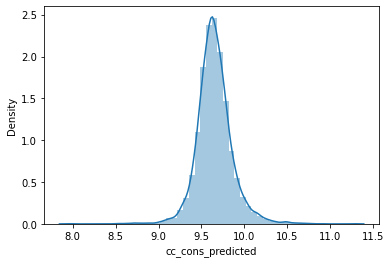

In [343]:
sns.distplot(log_test.cc_cons_predicted)

### XGBoost Using PowerTransformation and Varaibles choosed in PowerTransformation

In [313]:
#Dataset with Vars choosen for XG Boost with PowerTransformation!
df_test_pt=df_test[df_test.columns.difference(['cc_cons'])]

In [321]:
pt_col=train_pt_x.columns

In [323]:
df_test_pt=df_test_pt[pt_col]
df_test_pt

,Avg_days_between_transaction,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_may,credit_amount_apr,credit_amount_may,debit_amount_may,debit_count_apr,emi_active,investment_3,max_credit_amount_jun
0,16.000000,2795.450,9146.10,6141.05,10,44341.00,41755.00,23512.67,16.0,1170.49,1633.0,25945.92
1,19.000000,29405.130,10947.50,1670.00,10,21946.00,130299.00,15049.44,42.0,16447.45,891.0,12214.00
2,15.000000,5985.200,716.00,2696.09,30,36616.50,40422.00,133659.00,41.0,2622.28,54101.0,13215.00
3,7.000000,2105.930,4260.27,34763.56,99,43173.38,48148.00,99686.03,46.0,340.79,5905.0,72317.00
4,3.000000,3269.000,3373.48,3158.40,10,15232.00,25926.00,190374.25,11.0,2812.20,130000.0,42344.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7.000000,4641.500,41743.00,6008.61,1,37646.41,45461.00,34952.75,6.0,7870.88,492.0,58037.00
4996,2.000000,4994.450,1041.00,23214.00,56,1605.00,85422.00,17261.41,32.0,3668.30,10271.0,24110.00
4997,16.000000,3262.145,4130.00,7335.25,77,80044.00,68985.86,142002.00,32.0,5450.34,30000.0,1769.00
4998,13.000000,12824.010,15132.77,12242.48,1,66057.00,13558.00,156995.05,40.0,59.29,925.0,37255.00


In [325]:
#DataFrame transfomed with PowerTransformation(Method:Box-Cox)!
pt_test=pd.DataFrame(pt.fit_transform(abs(df_test_pt).replace(to_replace=0,method='ffill')),columns=df_test_pt.columns)

In [340]:
#XG Boost with PowerTransformation Model used for predicting the Test Dataset!
pt_test['cc_cons_predicted']=xgb1.predict(pt_test)

In [341]:
pt_test

,Avg_days_between_transaction,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_may,credit_amount_apr,credit_amount_may,debit_amount_may,debit_count_apr,emi_active,investment_3,max_credit_amount_jun,cc_cons_predicted
0,9.333793,9.742439,11.554322,9.860453,2.662247,29.493417,30.904116,20.229552,4.059377,9.343648,7.944656,34.983357,8.859936
1,10.801237,13.457235,11.839159,8.233796,2.662247,25.585636,38.940990,18.692782,6.311410,14.340517,7.251181,29.214015,8.886961
2,8.829744,10.896722,7.781637,8.825355,4.224363,28.384424,30.697536,27.107450,6.248041,10.764178,12.112002,29.775769,8.821433
3,4.404831,9.324094,10.372033,12.118610,6.179668,29.336689,31.825125,25.838921,6.554242,7.331833,9.442755,44.434605,8.873442
4,1.706038,9.976135,10.019770,9.022539,2.662247,23.729242,27.984071,28.700888,3.326177,10.891456,13.199939,39.248956,8.811763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4.404831,10.506323,14.042025,9.832734,0.000000,28.542965,31.451120,21.669194,2.281169,12.845002,6.579122,42.233269,8.887174
4996,0.909066,10.618349,8.306277,11.582922,5.210662,14.466340,35.771729,19.155949,5.618796,11.381407,10.099265,34.380846,8.919398
4997,9.333793,9.972988,10.324923,10.086989,5.743864,33.145958,34.254385,27.375230,5.618796,12.129913,11.390406,17.958568,8.815497
4998,7.795449,12.097003,12.358585,10.746237,0.000000,31.918884,24.381937,27.823641,6.183517,4.784156,7.293817,38.091633,8.793108


<AxesSubplot:xlabel='cc_cons_predicted', ylabel='Density'>

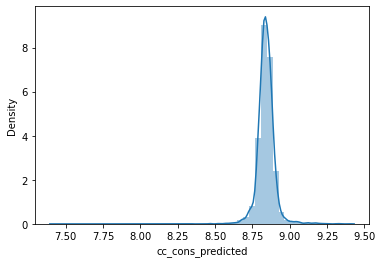

In [342]:
sns.distplot(pt_test.cc_cons_predicted)

Refer Word Document for Detailed Report!